# Exploratory Data Analysis Pt.3
## Define Libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Getting rid of the SettingWithCopyWarning: 
pd.options.mode.chained_assignment = None

## Upload Data

In [2]:
# Set working directory
path = '/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Data'
os.chdir(path)

# Load data into a DataFrame
dtf = pd.read_parquet("dtf_with_change_col.parquet")

print(dtf.info())

# Create a new column 'magnitude' that is a categorical variable which takes the value 'loss' if the change is negative and 'gain' if the change is positive, and 'draw' of change is 0
dtf['result_type'] = dtf['percent_return'].apply(lambda x: 'loss' if x < 0 else 'gain' if x > 0 else 'draw')

# Create another categorical column 'timing' that is 'first leg' for the first observations from 1 to 40 in the time column, 'second leg' for the second observations from 41 to 80, and 'third leg' for the third observations from 81 to 120, and 'fourth leg' for the fourth observations from 121 to 160, and 'fifth leg' for the fifth observations from 161 to 200, and 'sixth leg' for the sixth observations from 201 to 240, and 'seventh leg' for the seventh observations from 241 to 280, and 'eighth leg' for the eighth observations from 281 to 320
dtf['timing'] = dtf['gambles'].apply(lambda x: 'leg 1' if x <= 40 else 'leg 2' if x <= 80 else 'leg 3' if x <= 120 else 'leg 4' if x <= 160 else 'leg 5' if x <= 200 else 'leg 6' if x <= 240 else 'leg 7' if x <= 280 else 'leg 8' if x <= 320 else 'leg 9')

# Create a categorical column "denom_type" that is 'increase' if column 'increase_slotdeno' is 1, and 'decrease' if column 'decrease_slotdeno' is 1, and no change if both columns are 0
dtf['denom_type'] = dtf.apply(lambda x: 'higher' if x['increase_slotdeno'] == 1 else 'lower' if x['decrease_slotdeno'] == 1 else 'no change', axis=1)

# Create a categorical column "maxbet_type" that is 'increase' if column 'increase_maxbet' is 1, and 'decrease' if column 'decrease_maxbet' is 1, and no change if both columns are 0
dtf['maxbet_type'] = dtf.apply(lambda x: 'increase' if x['increase_maxbet'] == 1 else 'decrease' if x['decrease_maxbet'] == 1 else 'no change', axis=1)

# Create categorical column "payback_type" that is 'increase' if column 'increase_payback' is 1, and 'decrease' if column 'decrease_payback' is 1, and no change if both columns are 0
dtf['payback_type'] = dtf.apply(lambda x: 'higher' if x['increase_payback'] == 1 else 'lower' if x['decrease_payback'] == 1 else 'no change', axis=1)

# Create a categorical column "theowin_type" that is 'increase' if column 'increase_theoricalwin' is 1, and 'decrease' if column 'decrease_theoricalwin' is 1, and no change if both columns are 0
dtf['theowin_type'] = dtf.apply(lambda x: 'higher' if x['increase_theoricalwin'] == 1 else 'lower' if x['decrease_theoricalwin'] == 1 else 'no change', axis=1)

# Send dtf to parquet file
dtf.to_parquet("dtf_categorical_col.parquet")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89996 entries, 0 to 90273
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   starteventdatetime            89996 non-null  object 
 1   endeventdatetime              89996 non-null  object 
 2   playercashableamt             89996 non-null  float64
 3   wageredamt                    89996 non-null  float64
 4   casino_grosswin               89996 non-null  float64
 5   playerkey                     89996 non-null  int64  
 6   age                           89996 non-null  int64  
 7   maxbet                        89996 non-null  int64  
 8   assetnumber                   89996 non-null  int64  
 9   theoreticalwin                89996 non-null  float64
 10  theoreticalpaybackpercent     89996 non-null  float64
 11  player_loss                   89996 non-null  float64
 12  player_wins                   89996 non-null  float64
 13  p

In [3]:
# Slice data to only include time from 360 and below because this is the median or more frequent number of gambles among players.
dtf_2 = dtf[dtf['gambles'] <= 360]

In [4]:
# Mean of losses
mean_loss = round(dtf_2[dtf_2['result_type'] == 'loss']['percent_return'].mean(), 2)

# Mean of gains
mean_gain = round(dtf_2[dtf_2['result_type'] == 'gain']['percent_return'].mean(), 2)

# Counf the overall number of losses, gains, and draws
print("Overall number of losses:", dtf['result_type'].value_counts()['loss'])
print("Overall number of gains:", dtf['result_type'].value_counts()['gain'])
print("Overall number of draws:", dtf['result_type'].value_counts()['draw'])

# Mean of percent return for losses
print("Mean of percent return for losses:", mean_loss)

# Mean of percent return for gains
print("Mean of percent return for gains:", mean_gain)

Overall number of losses: 70914
Overall number of gains: 12781
Overall number of draws: 6301
Mean of percent return for losses: -89.6
Mean of percent return for gains: 389.04


## Outcome Type EDA

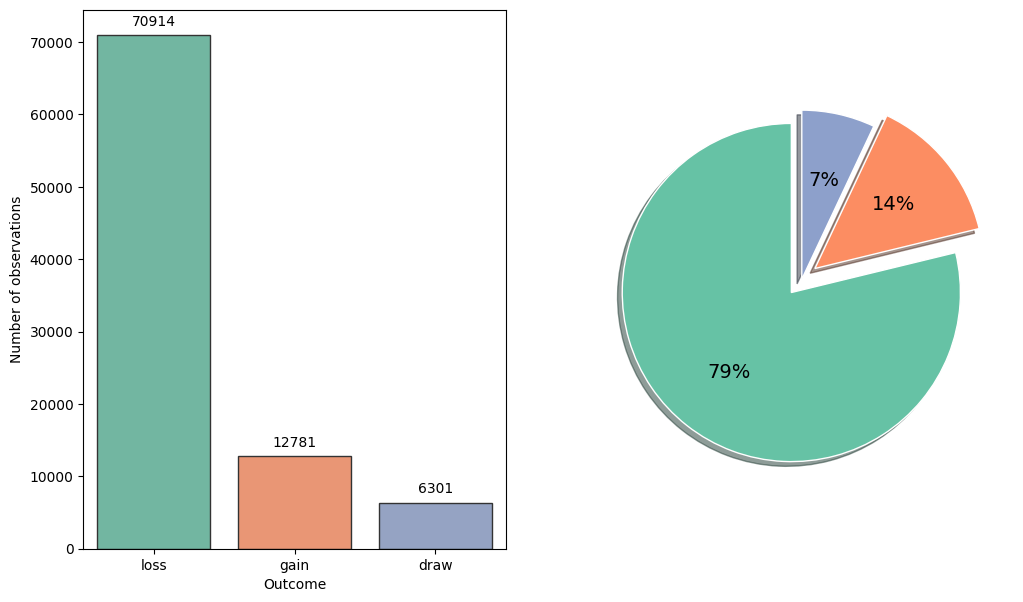

In [5]:
# Set palette for all plots

sns.set_palette("Set2")
# Create a barplot of the number of losses, gains, and draws
# Create figure 1
fig1, axes1 = plt.subplots(1, 2)
sns.countplot(x='result_type', data=dtf, order=['loss', 'gain', 'draw'], edgecolor=".2", ax=axes1[0])
axes1[0].set(xlabel='Outcome', ylabel='Number of observations')
# Display values on center top of each bar
for p in axes1[0].patches:
    axes1[0].annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Create pie chart of the number of losses, gains, and draws, add it to axes1[1]
axes1[1].pie(dtf['result_type'].value_counts(), labels=None, autopct='%.0f%%', startangle=90, textprops={'fontsize': 14}, explode=(0.1, 0.1, 0), shadow=True, wedgeprops={'linewidth': 1, 'edgecolor': 'white', 'antialiased': True})


# Make figure 1 bigger
fig1.set_size_inches(12, 7)

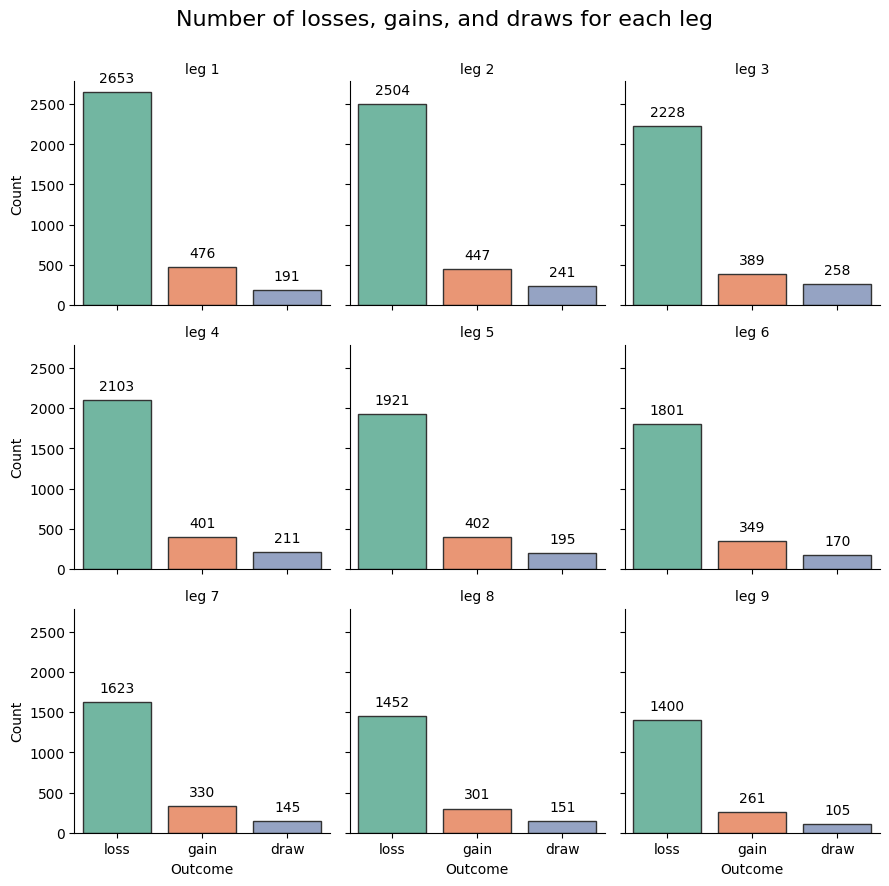

In [6]:
# Create a barplot of the number of losses, gains, and draws for each leg
g = sns.FacetGrid(dtf_2, col="timing", col_wrap=3)
g.map(sns.countplot, "result_type", order=['loss', 'gain', 'draw'], palette="Set2", edgecolor=".2")
g.set_axis_labels("Outcome", "Count")
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
# Display whole values (no decimals) on center top of bars
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# figure title
g.fig.suptitle('Number of losses, gains, and draws for each leg', fontsize=16)
plt.show()


## Magnitude of Losses and Gains

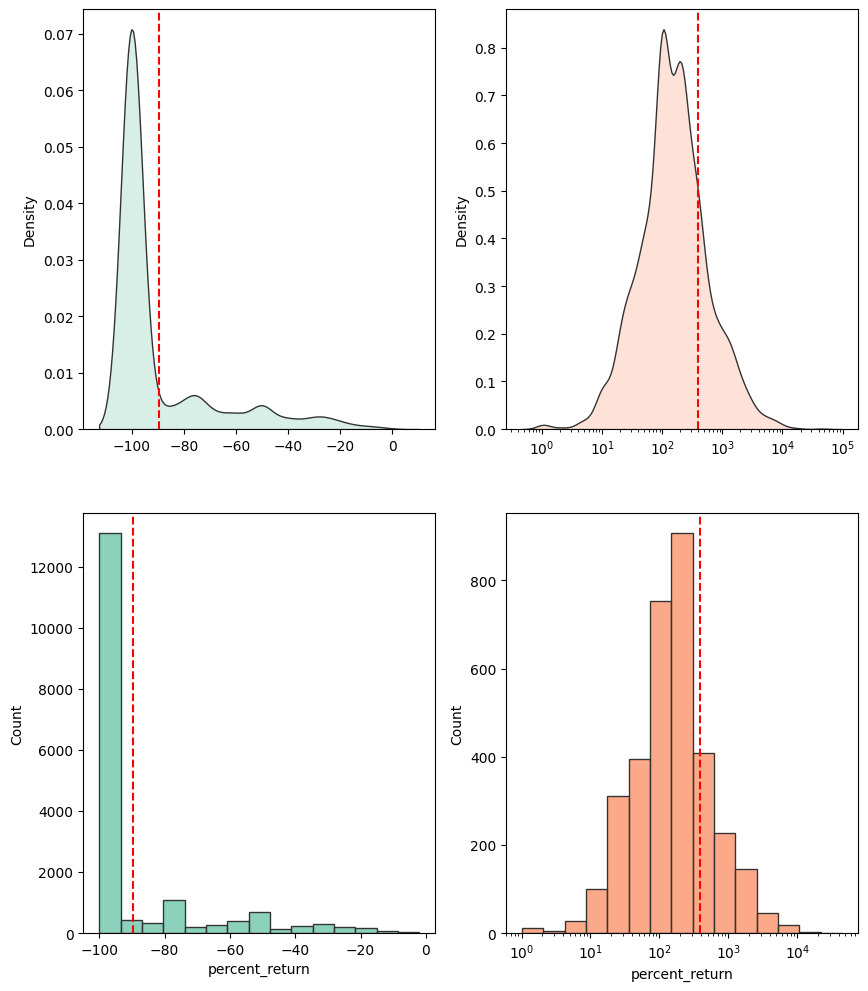

In [7]:
# Create figure 3
fig3, axes3 = plt.subplots(2, 2)
# Add a kdeplot on axes3[0,0] with no log scale
sns.kdeplot(dtf_2[dtf_2['result_type'] == 'loss']['percent_return'], fill=True, ax=axes3[0,0], bw_method=0.2, edgecolor=".2", color='#66c2a5')
# add a vertical line at the mean
axes3[0,0].axvline(mean_loss, color='r', linestyle='--')
# Remove Label
axes3[0,0].set(xlabel=None)
# Add a histogram on axes3[0,1]
sns.histplot(dtf_2[dtf_2['result_type'] == 'loss']['percent_return'], ax=axes3[1,0], bins=15, edgecolor=".2", color='#66c2a5')
# add a vertical line at the mean
axes3[1,0].axvline(mean_loss, color='r', linestyle='--')

# Add a kdeplot on axes3[1,0] with log scale
sns.kdeplot(dtf_2[dtf_2['result_type'] == 'gain']['percent_return'], fill=True, ax=axes3[0,1], bw_method=0.2, edgecolor=".2", color='#fc8d62', log_scale=True)
# add a vertical line at the mean
axes3[0,1].axvline(mean_gain, color='r', linestyle='--')
# Remove Label
axes3[0,1].set(xlabel=None)
# Add a histogram on axes3[1]
sns.histplot(dtf_2[dtf_2['result_type'] == 'gain']['percent_return'], ax=axes3[1,1], bins=15, edgecolor=".2", color='#fc8d62', log_scale=True)
# add a vertical line at the mean
axes3[1,1].axvline(mean_gain, color='r', linestyle='--')

# Make figure bigger
fig3.set_size_inches(10, 12)

# Overall Denomination, Maxbet, and Payback Type

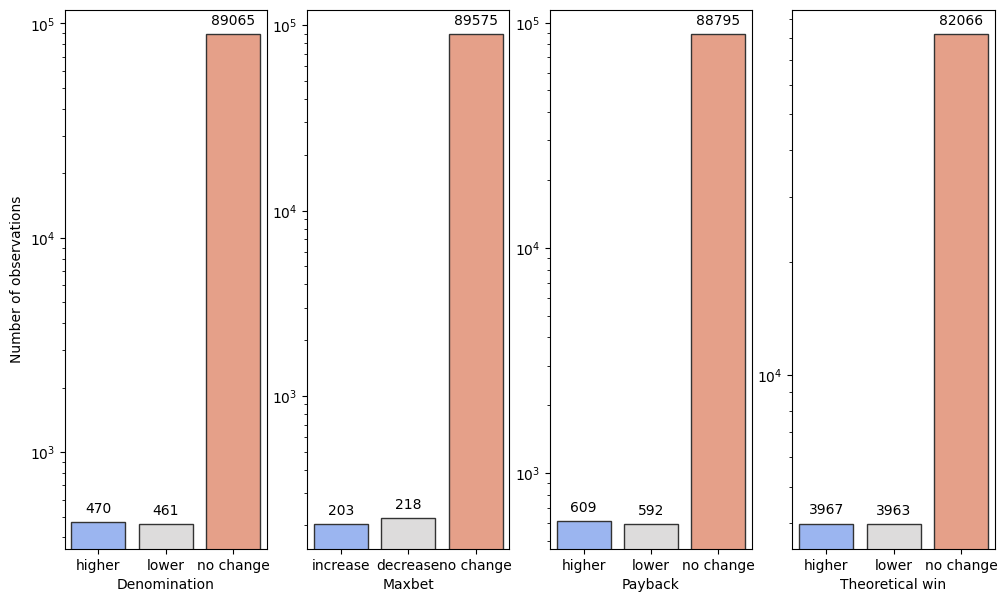

In [8]:

# Create figure 4 that is the same as figure 1 but with the denom_type column
fig4, axes4 = plt.subplots(1, 4)
sns.countplot(x='denom_type', data=dtf, order=['higher', 'lower', 'no change'], edgecolor=".2", ax=axes4[0], palette='coolwarm')
# Scale the y-axis to the number of observations
axes4[0].set(yscale="log")
axes4[0].set(xlabel='Denomination', ylabel='Number of observations')

# Create a count plot with the maxbet_type column
sns.countplot(x='maxbet_type', data=dtf, order=['increase', 'decrease', 'no change'], edgecolor=".2", ax=axes4[1], palette='coolwarm')
# Scale the y-axis to the number of observations
axes4[1].set(yscale="log")
axes4[1].set(xlabel='Maxbet', ylabel=None)

# Create a count plot with the payback_type column
sns.countplot(x='payback_type', data=dtf, order=['higher', 'lower', 'no change'], edgecolor=".2", ax=axes4[2], palette='coolwarm')
# Scale the y-axis to the number of observations
axes4[2].set(yscale="log")
axes4[2].set(xlabel='Payback', ylabel=None)

# Create a count plot with 'theowin_type' column
sns.countplot(x='theowin_type', data=dtf, order=['higher', 'lower', 'no change'], edgecolor=".2", ax=axes4[3], palette='coolwarm')
# Scale the y-axis to the number of observations
axes4[3].set(yscale="log")
axes4[3].set(xlabel='Theoretical win', ylabel=None)

# Display values on center top of all bars
for ax in axes4:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
# Make figure 4 bigger
fig4.set_size_inches(12, 7)


## Per Leg Denomination, Maxbet, Payback Type, Theoritocal Win Count

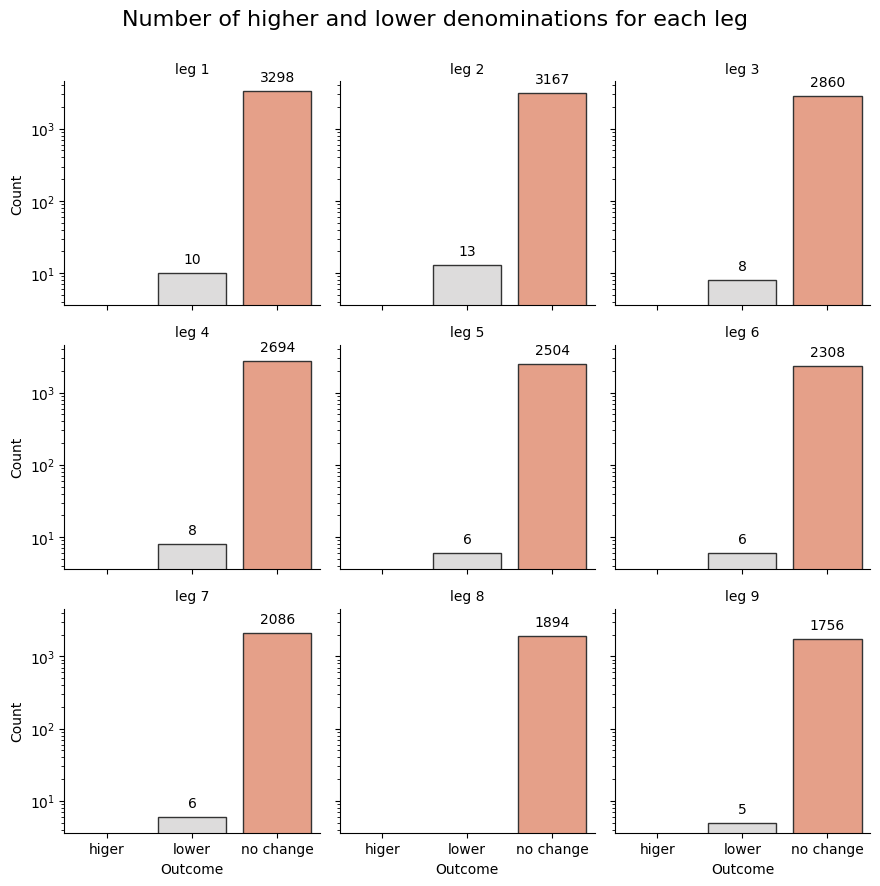

In [9]:

# Create a map countor plot with timing as the FacetGrid column, and denom_type in the countplot
g = sns.FacetGrid(dtf_2, col="timing", col_wrap=3)
g.map(sns.countplot, "denom_type", order=['higer', 'lower', 'no change'], edgecolor=".2", palette="coolwarm")
g.set_axis_labels("Outcome", "Count")
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
# Display whole values (no decimals) on center top of bars
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Set figure title
g.fig.suptitle('Number of higher and lower denominations for each leg', fontsize=16)
# log scale
g.set(yscale="log")
plt.show()

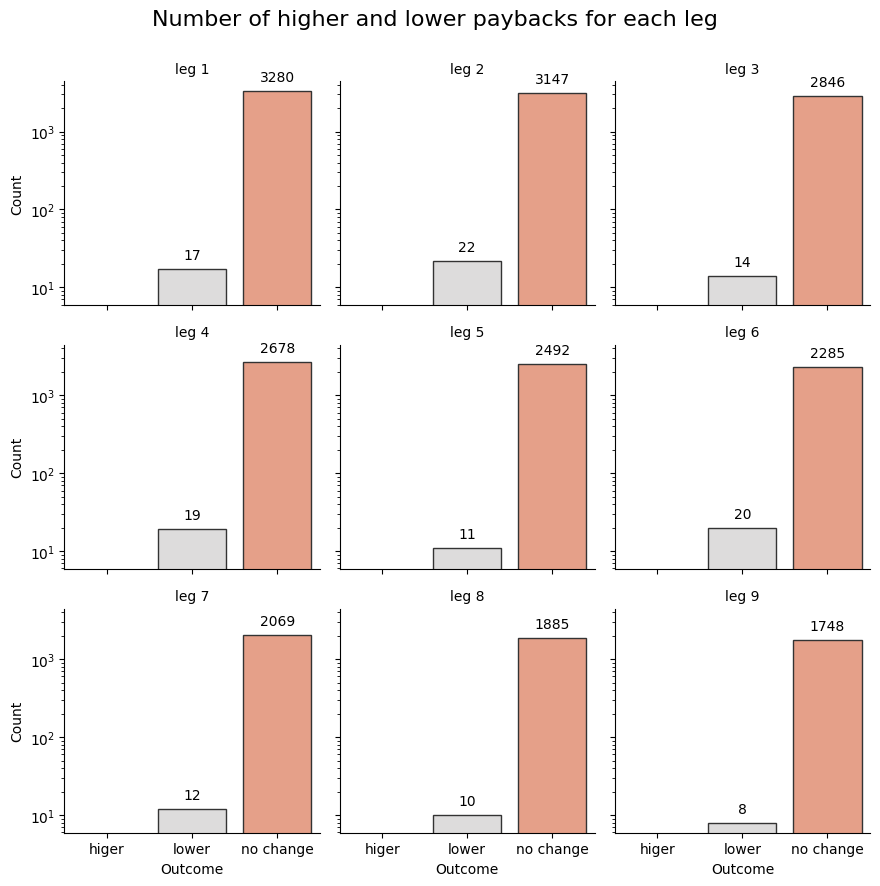

In [10]:
# Create a map countor plot with timing as the FacetGrid column, and payback_type in the countplot
g = sns.FacetGrid(dtf_2, col="timing", col_wrap=3)
g.map(sns.countplot, "payback_type", order=['higer', 'lower', 'no change'], edgecolor=".2", palette="coolwarm")
g.set_axis_labels("Outcome", "Count")
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
# Display whole values (no decimals) on center top of bars
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Set figure title
g.fig.suptitle('Number of higher and lower paybacks for each leg', fontsize=16)
# log scale 
g.set(yscale="log")
plt.show()

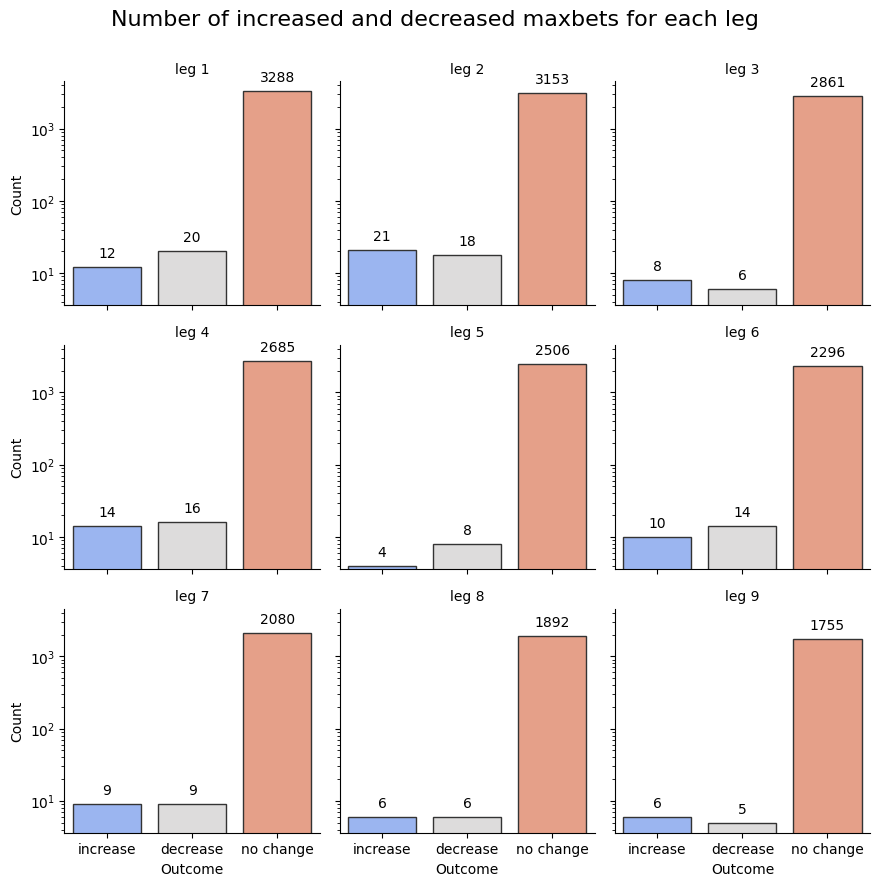

In [11]:
# Create a map countor plot with timing as the FacetGrid column, and maxbet_type in the countplot
g = sns.FacetGrid(dtf_2, col="timing", col_wrap=3)
g.map(sns.countplot, "maxbet_type", order=['increase', 'decrease', 'no change'], edgecolor=".2", palette="coolwarm")
g.set_axis_labels("Outcome", "Count")
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
# Display whole values (no decimals) on center top of bars
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Set figure title
g.fig.suptitle('Number of increased and decreased maxbets for each leg', fontsize=16)
# Log scale the y-axis
g.set(yscale="log")
plt.show()

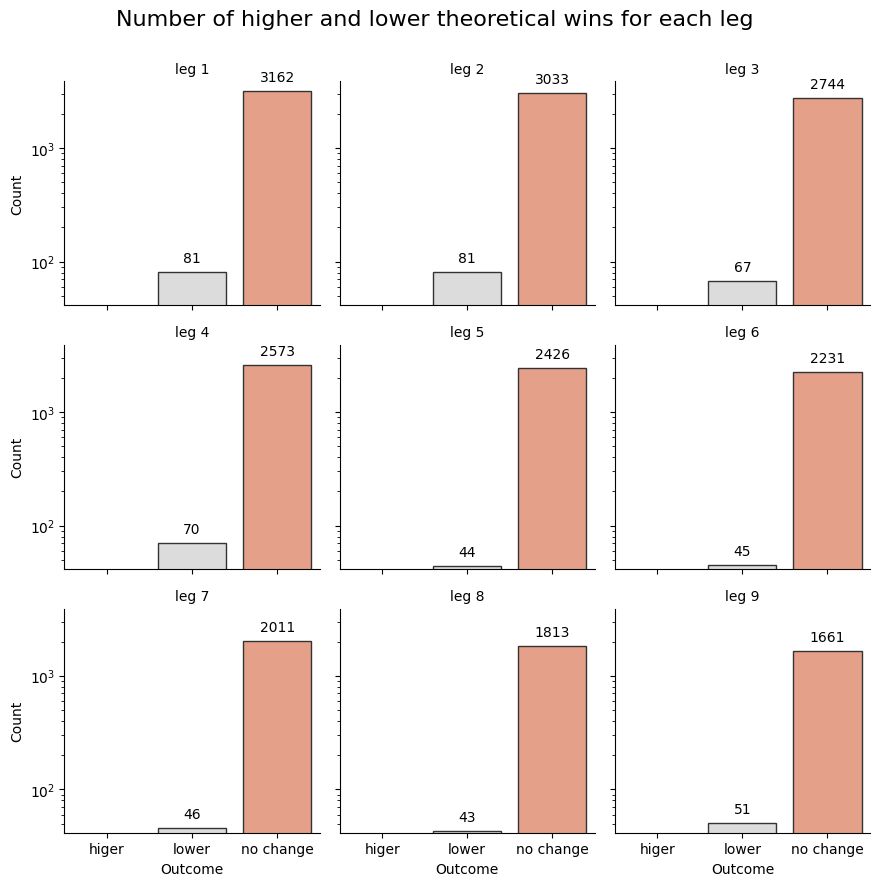

In [12]:
# Create a map countor plot with timing as the FacetGrid column, and theowin_type in the countplot
g = sns.FacetGrid(dtf_2, col="timing", col_wrap=3)
g.map(sns.countplot, "theowin_type", order=['higer', 'lower', 'no change'], edgecolor=".2", palette="coolwarm")
g.set_axis_labels("Outcome", "Count")
g.set_titles("{col_name}")
g.fig.subplots_adjust(top=0.9)
# Display whole values (no decimals) on center top of bars
for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# Set figure title
g.fig.suptitle('Number of higher and lower theoretical wins for each leg', fontsize=16)
# Log scale the y-axis
g.set(yscale="log")
plt.show()

## More Bar Plots

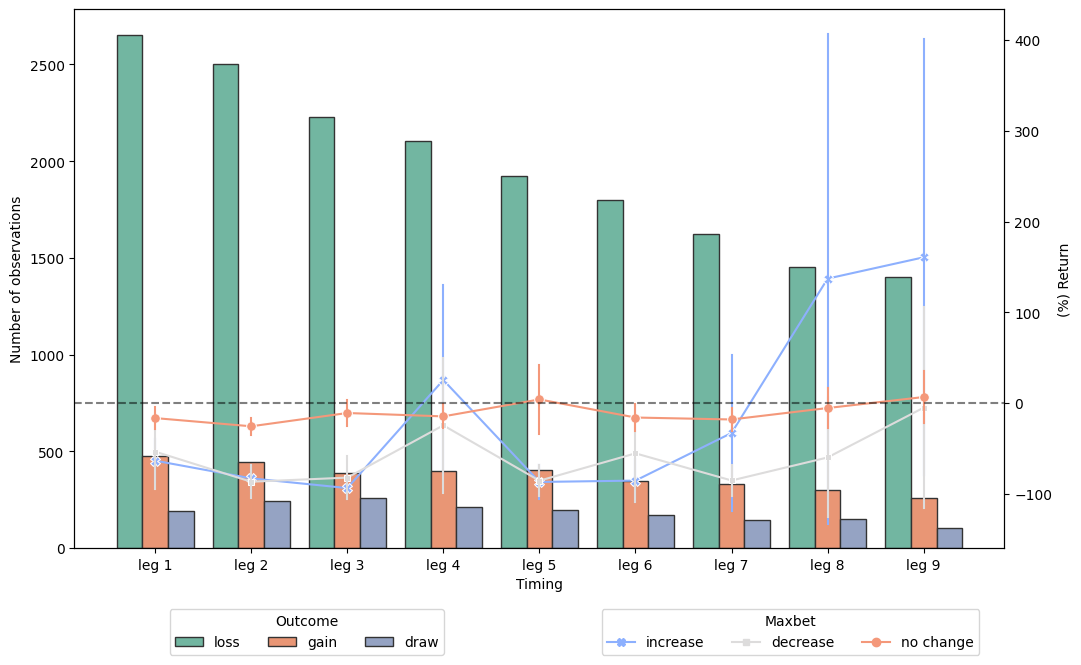

In [13]:
# Create figure 5 
fig5, axes5 = plt.subplots(1, 1)
# Create a count plot with the result_type column
sns.countplot(x='timing', data=dtf_2, hue='result_type', edgecolor=".2", ax=axes5, palette='Set2')

# Create a second y-axis
axes5_2 = axes5.twinx()
# Create a line plot with the percent_return column
sns.lineplot(x='timing', y='percent_return', data=dtf_2, ax=axes5_2, hue='maxbet_type', hue_order=['increase', 'decrease', 'no change'], 
             style='maxbet_type', palette='coolwarm', markers=True, dashes=False, markersize=7, err_style="bars", errorbar=("se", 2))

# Set the y-axis label
axes5.set_ylabel('Number of observations')
axes5_2.set_ylabel('(%) Return')
# Set the x-label
axes5.set_xlabel('Timing')

# Set legnds on the bottom of the plot
axes5.legend(loc='upper center', bbox_to_anchor=(0.25, -0.10), ncol=3)
axes5_2.legend(loc='upper center', bbox_to_anchor=(0.77, -0.10), ncol=3)
# Set legnd titles
axes5.legend_.set_title('Outcome')
axes5_2.legend_.set_title('Maxbet')

# Make figure 5 bigger
fig5.set_size_inches(12, 7)

# Draw a horizontal line at y=0
axes5_2.axhline(y=0, color='black', linestyle='--', alpha=0.5)

# Make background more opaque
axes5.patch.set_alpha(1)

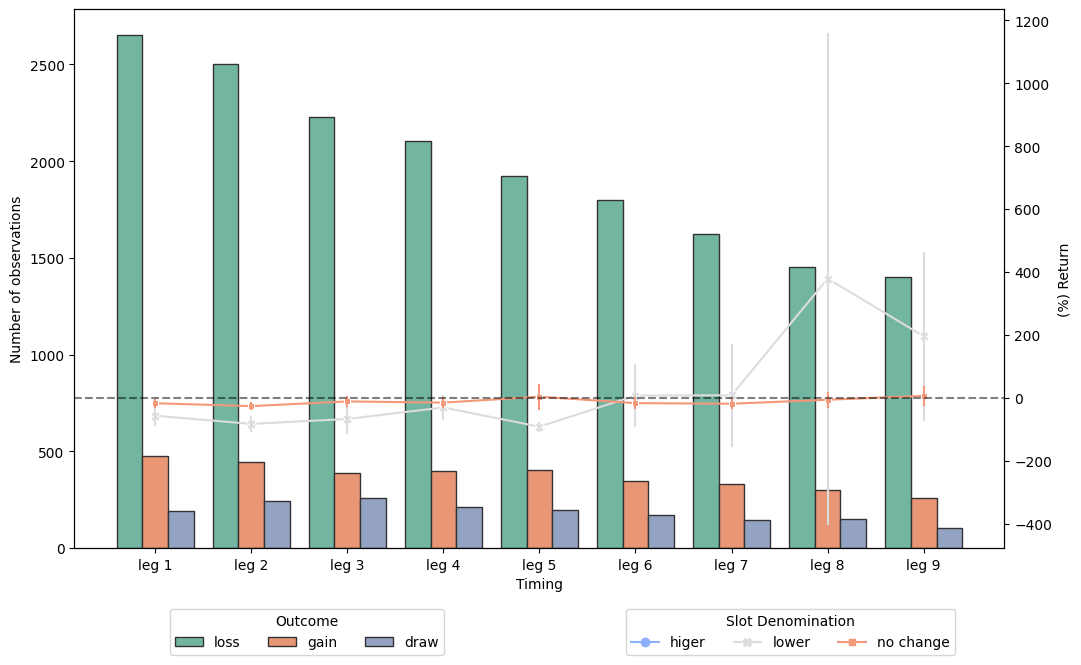

In [14]:
# Create figure 6 
fig6, axes6 = plt.subplots(1, 1)
# Create a count plot with the result_type column
sns.countplot(x='timing', data=dtf_2, hue='result_type', edgecolor=".2", ax=axes6, palette='Set2')

# Create a second y-axis
axes6_2 = axes6.twinx()
# Create a line plot with the percent_return column
sns.lineplot(x='timing', y='percent_return', data=dtf_2, ax=axes6_2, hue='denom_type', hue_order=['higer', 'lower', 'no change'],
             style='denom_type', style_order=['higer', 'lower', 'no change'], palette='coolwarm', markers=True, dashes=False, markersize=7, err_style="bars", errorbar=("se", 2))

# Set the y-axis label
axes6.set_ylabel('Number of observations')
axes6_2.set_ylabel('(%) Return')
# Set the x-label
axes6.set_xlabel('Timing')

# Set legnds on the bottom of the plot
axes6.legend(loc='upper center', bbox_to_anchor=(0.25, -0.10), ncol=3)
axes6_2.legend(loc='upper center', bbox_to_anchor=(0.77, -0.10), ncol=3)
# Set legnd titles
axes6.legend_.set_title('Outcome')
axes6_2.legend_.set_title('Slot Denomination')

# Make figure 5 bigger
fig6.set_size_inches(12, 7)

# Draw a horizontal line at y=0
axes6_2.axhline(y=0, color='black', linestyle='--', alpha=0.5)

# Make background more opaque
axes6.patch.set_alpha(1)

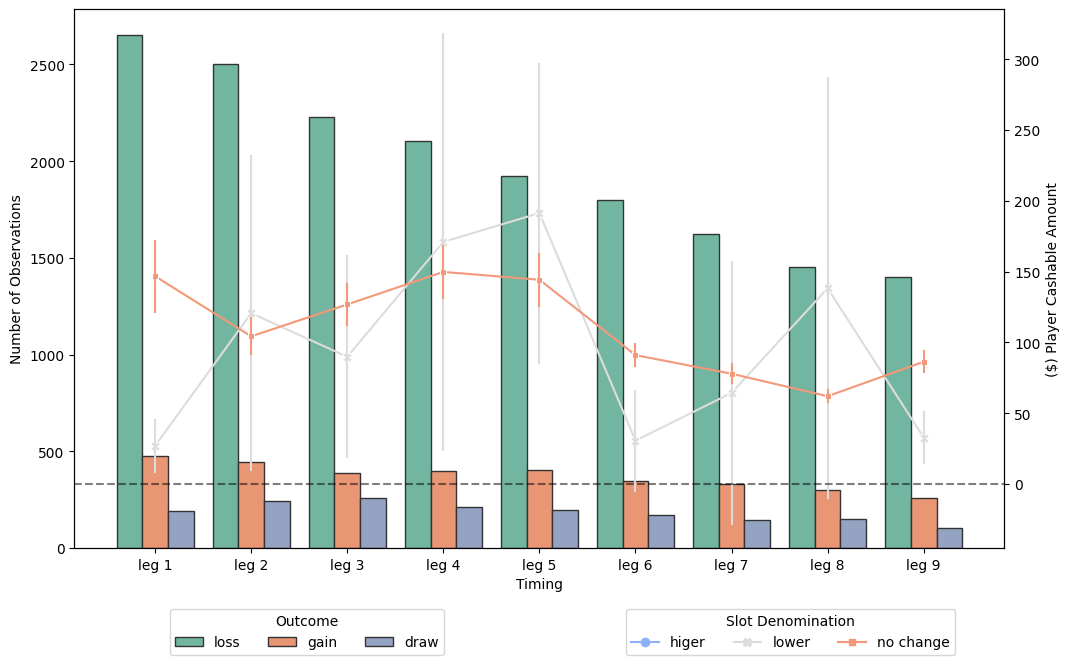

In [15]:
# Create figure 7 that is exactly the same as figure 6, but with playercashableamt instead of percent_return
fig7, axes7 = plt.subplots(1, 1)
# Create a count plot with the result_type column
sns.countplot(x='timing', data=dtf_2, hue='result_type', edgecolor=".2", ax=axes7, palette='Set2')

# Create a second y-axis
axes7_2 = axes7.twinx()
# Create a line plot with the percent_return column
sns.lineplot(x='timing', y='playercashableamt', data=dtf_2, ax=axes7_2, hue='denom_type', hue_order=['higer', 'lower', 'no change'],
                style='denom_type', style_order=['higer', 'lower', 'no change'], palette='coolwarm', markers=True, dashes=False, markersize=7, err_style="bars", errorbar=("se", 2))

# Set the y-axis label
axes7.set_ylabel('Number of Observations')
axes7_2.set_ylabel('($) Player Cashable Amount')
# Set the x-label
axes7.set_xlabel('Timing')

# Set legnds on the bottom of the plot
axes7.legend(loc='upper center', bbox_to_anchor=(0.25, -0.10), ncol=3)
axes7_2.legend(loc='upper center', bbox_to_anchor=(0.77, -0.10), ncol=3)
# Set legnd titles
axes7.legend_.set_title('Outcome')
axes7_2.legend_.set_title('Slot Denomination')

# Make figure 5 bigger
fig7.set_size_inches(12, 7)

# Draw a horizontal line at y=0
axes7_2.axhline(y=0, color='black', linestyle='--', alpha=0.5)

# Make background more opaque
axes7.patch.set_alpha(1)

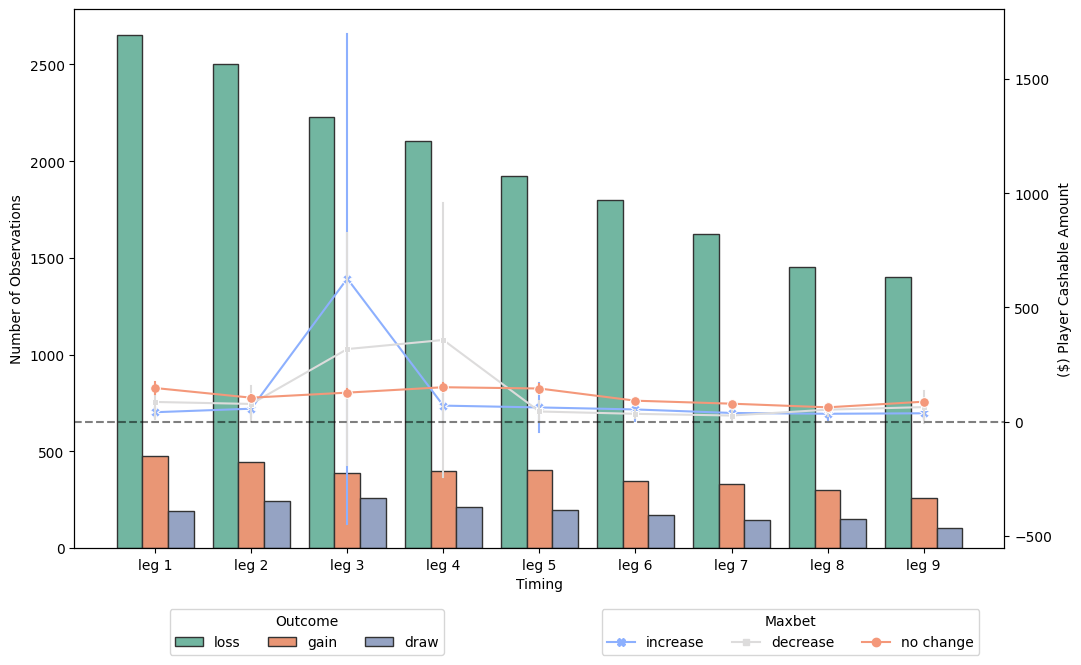

In [16]:
# Create figure 8 that is exactly the same as figure 5, but with playercashableamt instead of percent_return
fig8, axes8 = plt.subplots(1, 1)
# Create a count plot with the result_type column
sns.countplot(x='timing', data=dtf_2, hue='result_type', edgecolor=".2", ax=axes8, palette='Set2')

# Create a second y-axis
axes8_2 = axes8.twinx()
# Create a line plot with the percent_return column
sns.lineplot(x='timing', y='playercashableamt', data=dtf_2, ax=axes8_2, hue='maxbet_type', hue_order=['increase', 'decrease', 'no change'],
                style='maxbet_type', palette='coolwarm', markers=True, dashes=False, markersize=7, err_style="bars", errorbar=("se", 2))

# Set the y-axis label
axes8.set_ylabel('Number of Observations')
axes8_2.set_ylabel('($) Player Cashable Amount')
# Set the x-label
axes8.set_xlabel('Timing')

# Set legnds on the bottom of the plot
axes8.legend(loc='upper center', bbox_to_anchor=(0.25, -0.10), ncol=3)
axes8_2.legend(loc='upper center', bbox_to_anchor=(0.77, -0.10), ncol=3)
# Set legnd titles
axes8.legend_.set_title('Outcome')
axes8_2.legend_.set_title('Maxbet')

# Make figure 5 bigger
fig8.set_size_inches(12, 7)

# Draw a horizontal line at y=0
axes8_2.axhline(y=0, color='black', linestyle='--', alpha=0.5)

# Make background more opaque
axes8.patch.set_alpha(1)

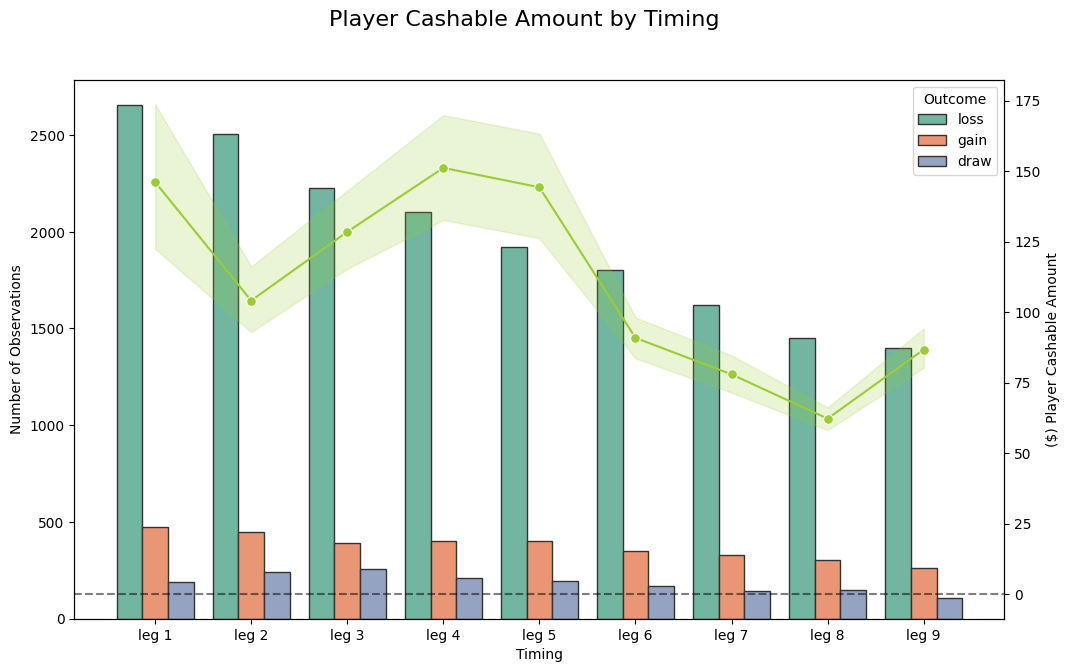

In [17]:
# Create figure 9 that is exactly the same as figure 5 but witout the hue in the lineplot
fig9, axes9 = plt.subplots(1, 1)
# Create a count plot with the result_type column
sns.countplot(x='timing', data=dtf_2, hue='result_type', edgecolor=".2", ax=axes9, palette='Set2')

# Create a second y-axis
axes9_2 = axes9.twinx()
# Create a line plot with the percent_return column
sns.lineplot(x='timing', y='playercashableamt', data=dtf_2, ax=axes9_2, marker='o', markersize=7, color='yellowgreen') 

# Set the y-axis label
axes9.set_ylabel('Number of Observations')
axes9_2.set_ylabel('($) Player Cashable Amount')
# Set the x-label
axes9.set_xlabel('Timing')
axes9.legend_.set_title('Outcome')

# Figure title
fig9.suptitle('Player Cashable Amount by Timing', fontsize=16)

# Make figure 5 bigger
fig9.set_size_inches(12, 7)

# Draw a horizontal line at y=0
axes9_2.axhline(y=0, color='black', linestyle='--', alpha=0.5)


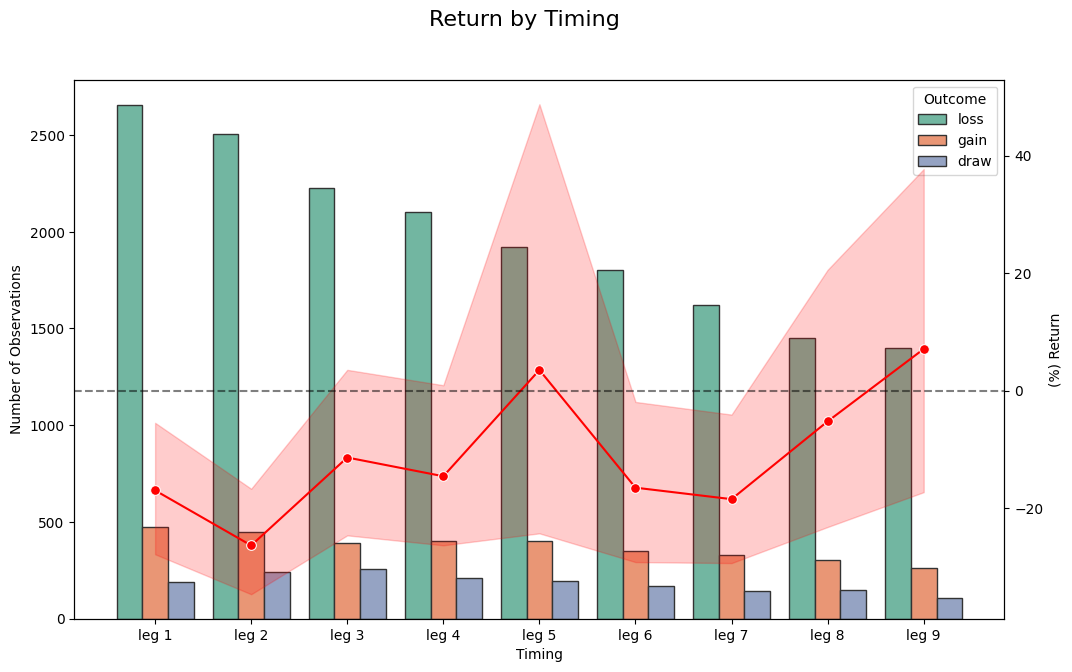

In [18]:
# Create figure 10 that is exactly the same as figure 9, but with percent_return instead of playercashableamt
fig10, axes10 = plt.subplots(1, 1)
# Create a count plot with the result_type column
sns.countplot(x='timing', data=dtf_2, hue='result_type', edgecolor=".2", ax=axes10, palette='Set2')

# Create a second y-axis
axes10_2 = axes10.twinx()
# Create a line plot with the percent_return column
sns.lineplot(x='timing', y='percent_return', data=dtf_2, ax=axes10_2, marker='o', markersize=7, color='r')

# Set the y-axis label
axes10.set_ylabel('Number of Observations')
axes10_2.set_ylabel('(%) Return')

# Set the x-label
axes10.set_xlabel('Timing')
axes10.legend_.set_title('Outcome')

# Figure title
fig10.suptitle('Return by Timing', fontsize=16)

# Make figure 5 bigger
fig10.set_size_inches(12, 7)

# Draw a horizontal line at y=0
axes10_2.axhline(y=0, color='black', linestyle='--', alpha=0.5)

# Correlation Matrix

The first correlation heat map does the following:
* The association between categorical variables is computed using Cramer's V (This could be replaced with Theil's U by adding theil_u=True to the parameters of nominal.associations).
* The association between categorical and numeric is computed using Correlation Ratio (same for Day and WorkingHours).
* The association between numeric variables is computed using Pearson's R (correlation).

                   timing  result_type  denom_type  maxbet_type  payback_type  \
timing               1.00         0.02        0.00         0.01          0.00   
result_type          0.02         1.00        0.00         0.01          0.00   
denom_type           0.00         0.00        1.00         0.49          0.47   
maxbet_type          0.01         0.01        0.49         1.00          0.57   
payback_type         0.00         0.00        0.47         0.57          1.00   
theowin_type         0.01         0.01        0.29         0.30          0.36   
percent_return       0.02         0.36        0.00         0.01          0.00   
playercashableamt    0.07         0.04        0.02         0.00          0.00   
age                  0.10         0.04        0.00         0.00          0.00   

                   theowin_type  percent_return  playercashableamt   age  
timing                     0.01            0.02               0.07  0.10  
result_type                0.01        

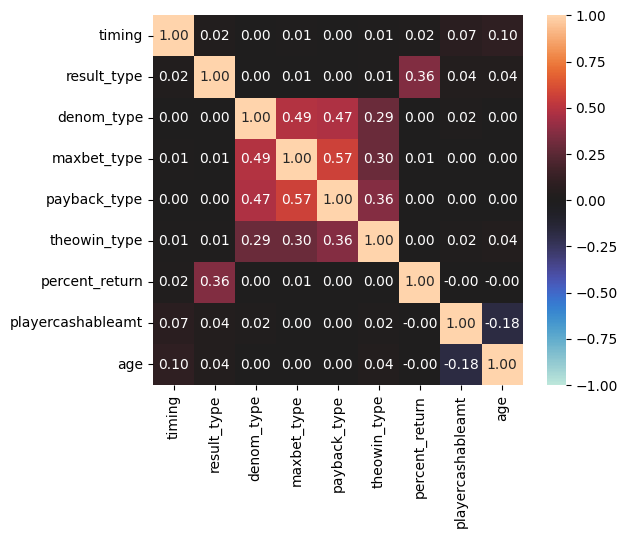

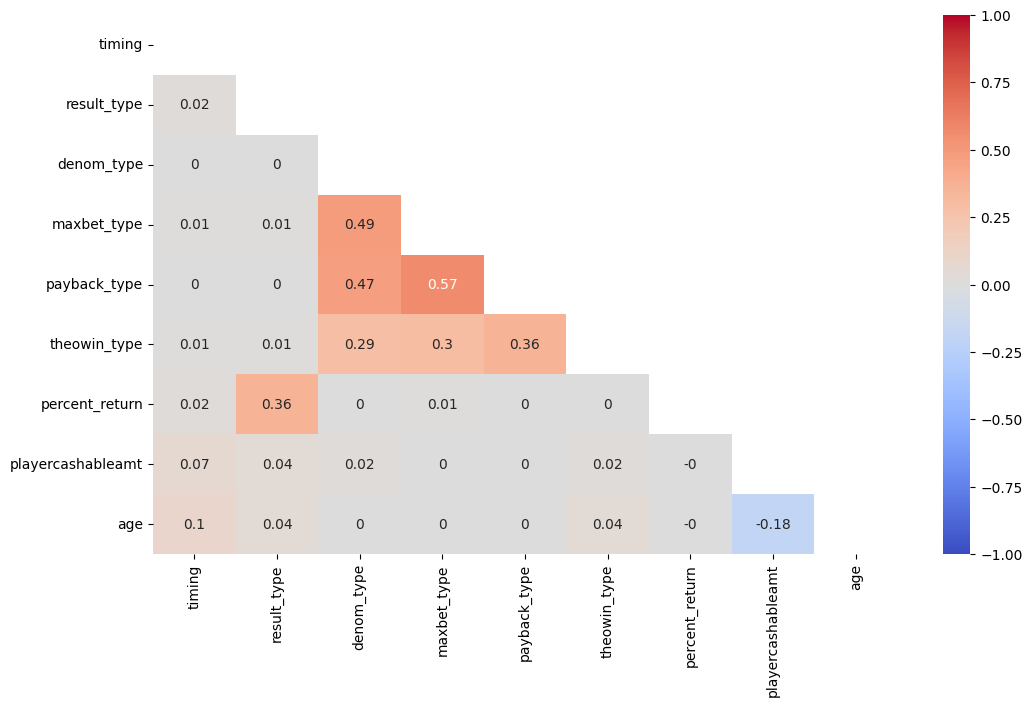

In [19]:
from dython.nominal import associations
import numpy as np

# Keep only columns that are categorical and percetn_return and playercashableamt
dtf_3 = dtf_2[['timing', 'result_type', 'denom_type', 'maxbet_type', 'payback_type', 'theowin_type', 'percent_return', 'playercashableamt', 'age']]

# Create a correlation matrix
r = associations(dtf_3, nominal_columns=['timing', 'result_type', 'denom_type', 'maxbet_type', 'payback_type', 'theowin_type'], plot=False)
correlation_matrix = r['corr'].round(2)
print(correlation_matrix)

# Create figure 11
fig11, axes11 = plt.subplots(1, 1)

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(correlation_matrix))
# Create a heatmap
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', ax=axes11, vmin=-1, vmax=1)

# Make figure 11 bigger
fig11.set_size_inches(12, 7)

## Estimating Cramer’s V association among nominal variables
In statistics, Cramér’s V (sometimes referred to as Cramér’s phi and denoted as φc) is a measure of association between two nominal variables [3]. The value ranges 0 to 1, where 0 indicates no association and 1 indicates a perfect association.

Cramer’s V facts:

* The value ranges between 0 and 1
* It is a symmetrical association measure [V(x, y) = V(y, x)]

              theowin_type  result_type  denom_type  maxbet_type  payback_type
theowin_type          1.00         0.01        0.29         0.30          0.36
result_type           0.01         1.00        0.00         0.01          0.00
denom_type            0.29         0.00        1.00         0.49          0.47
maxbet_type           0.30         0.01        0.49         1.00          0.57
payback_type          0.36         0.00        0.47         0.57          1.00


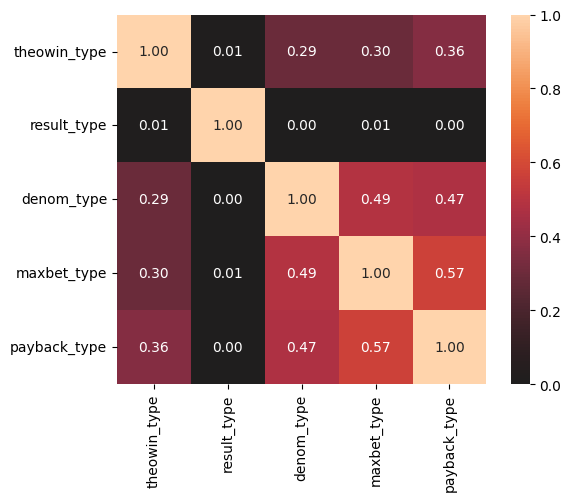

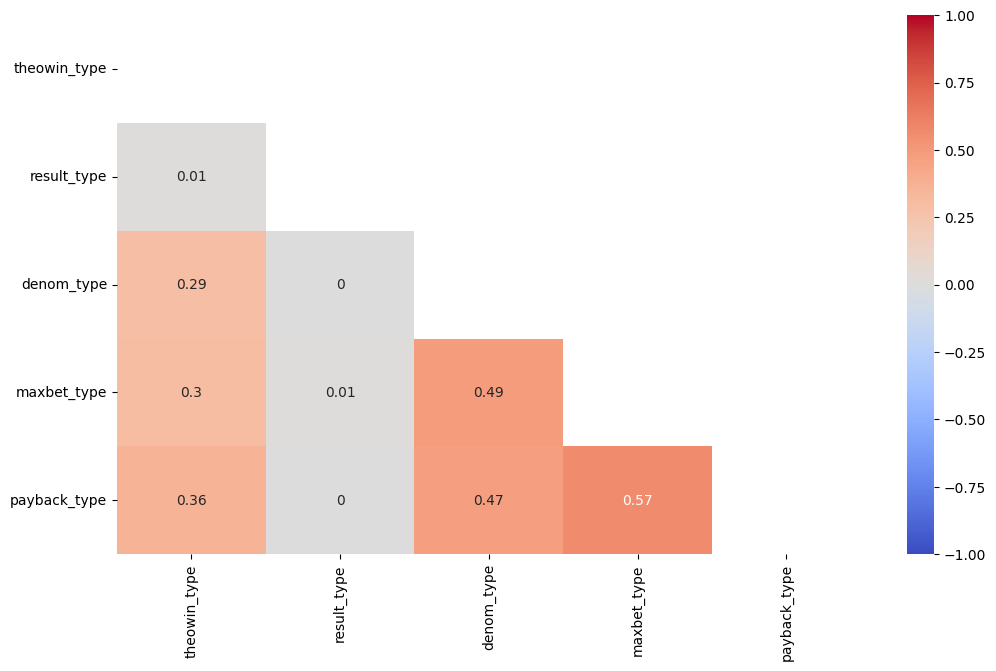

In [20]:
# Estimate and generarate a Cramers's V association matrix
cramers_v = associations(dtf_3[['theowin_type', 'result_type', 'denom_type', 'maxbet_type', 'payback_type']], nom_nom_assoc='cramer', plot=False)
cramers_v_matrix = cramers_v['corr'].round(2)
print(cramers_v_matrix)

# Create figure 12
fig12, axes12 = plt.subplots(1, 1)

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(cramers_v_matrix))
# Create a heatmap
sns.heatmap(cramers_v_matrix, mask=mask, annot=True, cmap='coolwarm', ax=axes12, vmin=-1, vmax=1)

# Make figure 12 bigger
fig12.set_size_inches(12, 7)


## Estimating Theil’s U pairwise association
In statistics, Theil’s U is a measure of association between two nominal variables [4, 5]. Similar to Cramer’s V, the value ranges 0 to 1, where 0 indicates no association and 1 indicates a perfect association.

Theil’s U facts:
* The value ranges between 0 and 1
* It is an asymmetrical association measure [U(x, y) ≠ U(y, x)]

              theowin_type  result_type  denom_type  maxbet_type  payback_type
theowin_type          1.00          0.0        0.09         0.12          0.18
result_type           0.00          1.0        0.00         0.00          0.00
denom_type            0.49          0.0        1.00         0.42          0.56
maxbet_type           0.49          0.0        0.32         1.00          0.69
payback_type          0.53          0.0        0.31         0.51          1.00


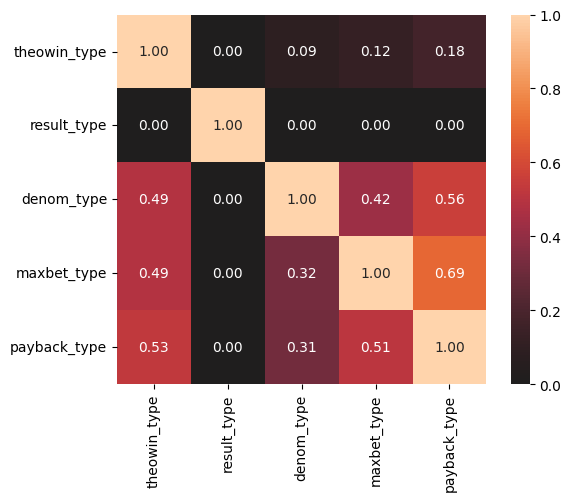

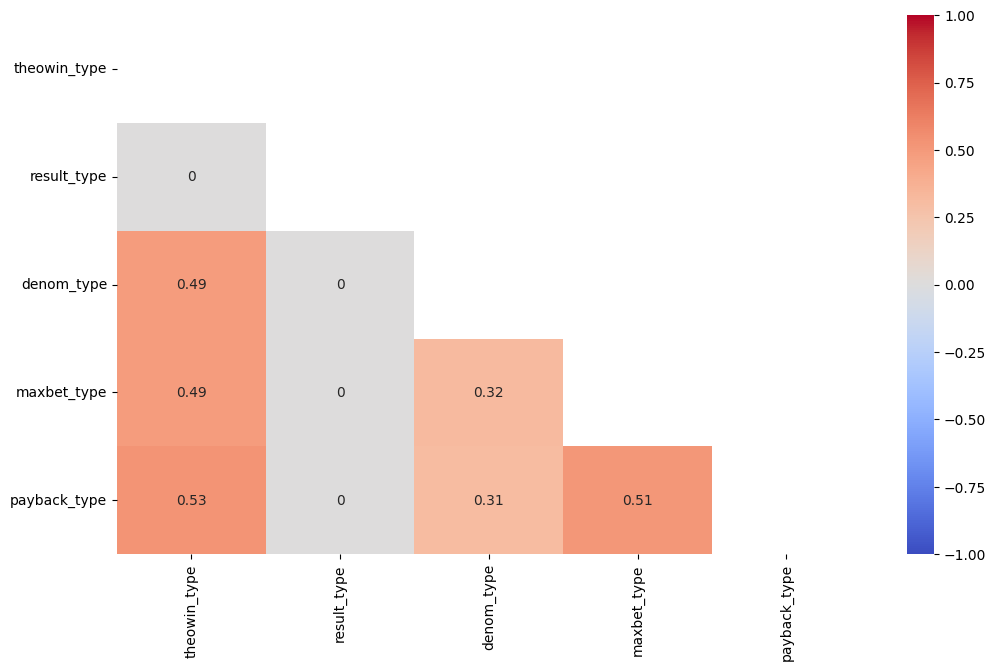

In [21]:
# Estimate and generate Theil's U association plot
theils_u = associations(dtf_3[['theowin_type', 'result_type', 'denom_type', 'maxbet_type', 'payback_type']], nom_nom_assoc='theil', plot=False)
theils_u_matrix = theils_u['corr'].round(2)
print(theils_u_matrix)

# Create figure 13
fig13, axes13 = plt.subplots(1, 1)

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(theils_u_matrix))
# Create a heatmap
sns.heatmap(theils_u_matrix, mask=mask, annot=True, cmap='coolwarm', ax=axes13, vmin=-1, vmax=1)

# Make figure 13 bigger
fig13.set_size_inches(12, 7)

## Estimating Pearson’s pairwise correlation coefficients

Parametric Correlation: Pearson correlation (r), is a linear association between two variables and presented in a range of -1 to +1.

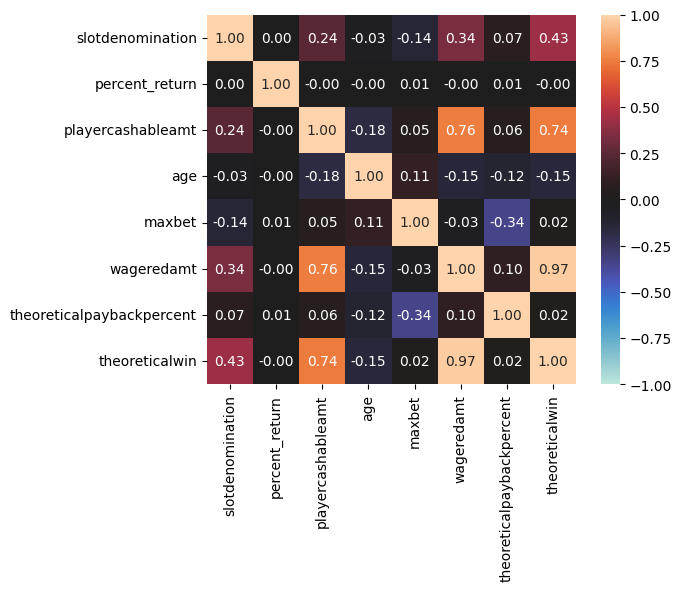

                           slotdenomination  percent_return  \
slotdenomination                       1.00            0.00   
percent_return                         0.00            1.00   
playercashableamt                      0.24           -0.00   
age                                   -0.03           -0.00   
maxbet                                -0.14            0.01   
wageredamt                             0.34           -0.00   
theoreticalpaybackpercent              0.07            0.01   
theoreticalwin                         0.43           -0.00   

                           playercashableamt   age  maxbet  wageredamt  \
slotdenomination                        0.24 -0.03   -0.14        0.34   
percent_return                         -0.00 -0.00    0.01       -0.00   
playercashableamt                       1.00 -0.18    0.05        0.76   
age                                    -0.18  1.00    0.11       -0.15   
maxbet                                  0.05  0.11    1.00    

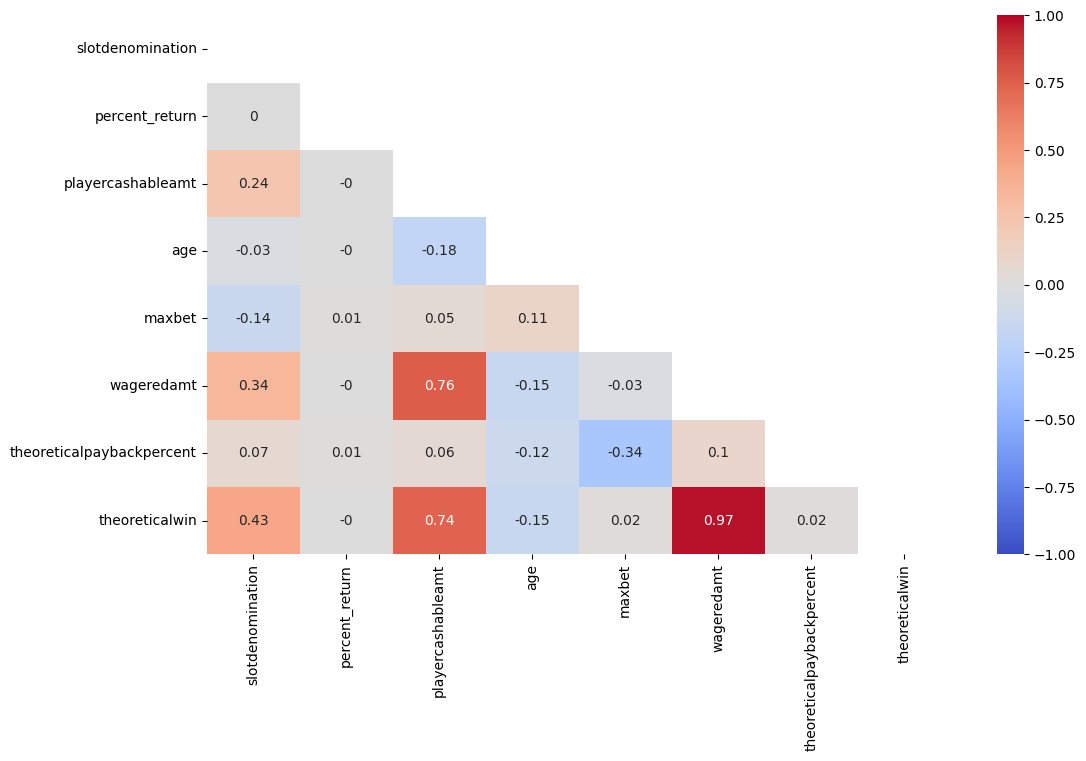

In [22]:
# Estimate and generate a Pearson's R association matrix
pearson_r = associations(dtf_2[['slotdenomination', 'percent_return', 'playercashableamt', 'age', 'maxbet', 'wageredamt', 'theoreticalpaybackpercent', 'theoreticalwin']])
pearson_r_matrix = pearson_r['corr'].round(2)
print(pearson_r_matrix)

# Create figure 14
fig14, axes14 = plt.subplots(1, 1)

# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(pearson_r_matrix))

# Create a heatmap
sns.heatmap(pearson_r_matrix, mask=mask, annot=True, cmap='coolwarm', ax=axes14, vmin=-1, vmax=1)

# Make figure 14 bigger
fig14.set_size_inches(12, 7)